TASK-9A: Please apply the following feature engineering steps on the numeric features of the AD dataset.

Divide by NACCBRNV (MRI)
Multiply by NACCAGEB

TASK-9B: Please apply Gaussian Naive Bayes algorithm on the numeric values (after the transformation) to predict the CDRGLOB values (class-based). Train-test split, train by grid search (k=5) and optimize for the parameter values.

TASK-9C: Please apply a one-hot encoding method on the categorical data of the AD dataset.

TASK–9D: Please apply Multinomial Naive Bayes algorithms on the one-hot encoded categorical data of the AD dataset and predict the labels (CDRGLOB).

TASK-9E: Please merge the normalized numeric values and one-hot encoded categorical values and then apply the following regression methods (Linear, Ridge and Lasso) to predict the labels as numeric values. Please do not forget to optimize them and use R2 for scoring.

TASK-9F: Please find and apply the classification versions of the following algorithms (Linear, Ridge and Lasso) with the hyperparameter optimization. 

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_excel("Temporary_data3_Left_Right_Copy.xlsx")
df

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,18,1,1,1,1,1,0,0,0,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1,11,1,1,1,1,1,0,0,0,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2,16,1,1,1,1,1,10,0,1,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,1,14,1,1,1,0,1,0,0,1,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,1,16,1,1,2,0,1,50,0,0,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1,20,1,1,1,1,1,0,0,0,...,24.6892,2.6528,10.5460,2.1712,14.1128,2.8833,9.3176,2.3582,0.6735,1.0270
1350,1,16,1,2,1,0,1,0,0,0,...,24.7908,2.0993,10.4094,1.4855,10.7880,1.9027,10.2034,2.0484,0.7267,0.7946
1351,2,14,2,1,1,1,1,0,0,0,...,23.8500,2.1200,12.3900,1.5300,12.6600,1.9900,9.4800,1.7400,1.1800,1.5900
1352,2,20,3,1,1,1,1,25,0,0,...,31.3500,2.4300,10.8200,1.7000,13.7700,2.1000,11.1200,2.1400,1.3100,1.5200


>TASK-9A: Please apply the following feature engineering steps on the numeric features of the AD dataset.

>Multiply by NACCAGEB
 and Divide by NACCBRNV (MRI)

In [31]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,18,1,1,1,1,1,0,0,0,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1,11,1,1,1,1,1,0,0,0,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2,16,1,1,1,1,1,10,0,1,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,1,14,1,1,1,0,1,0,0,1,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,1,16,1,1,2,0,1,50,0,0,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1,20,1,1,1,1,1,0,0,0,...,24.6892,2.6528,10.5460,2.1712,14.1128,2.8833,9.3176,2.3582,0.6735,1.0270
1350,1,16,1,2,1,0,1,0,0,0,...,24.7908,2.0993,10.4094,1.4855,10.7880,1.9027,10.2034,2.0484,0.7267,0.7946
1351,2,14,2,1,1,1,1,0,0,0,...,23.8500,2.1200,12.3900,1.5300,12.6600,1.9900,9.4800,1.7400,1.1800,1.5900
1352,2,20,3,1,1,1,1,25,0,0,...,31.3500,2.4300,10.8200,1.7000,13.7700,2.1000,11.1200,2.1400,1.3100,1.5200


In [32]:
data_naccageb = newdf.NACCAGEB
data_naccbrnv = newdf.NACCBRNV
num_cols = []
for i in df.columns:
    uniqueval = df[i].unique()
    if not (([0,1] in uniqueval or [1,0] in uniqueval) and len(uniqueval) == 2):
        num_cols.append(i)
        
num_cols.remove('NACCAGEB')
num_cols.remove('NACCBRNV')
y = df['CDRGLOB']
df.drop(columns = ["CDRGLOB"],inplace = True)
num_cols.remove('CDRGLOB')
numerical_df = df[num_cols]

<ipython-input-32-9655df7c69d1>:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if not (([0,1] in uniqueval or [1,0] in uniqueval) and len(uniqueval) == 2):


In [33]:
numerical_df = numerical_df.div(df['NACCBRNV'], axis=0)

numerical_df = numerical_df.mul(df["NACCAGEB"], axis=0)

In [34]:
numerical_df

,EDUC,MARISTAT,INDEPEND,RESIDENC,SMOKYRS,DIABETES,ALCOHOL,HYPERCHO,HACHIN,NACCGDS,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,0.900861,0.050048,0.050048,0.050048,0.000000,0.000000,0.0,0.050048,0.000000,0.000000,...,1.396525,0.110891,0.517900,0.085151,0.671892,0.087178,0.493972,0.084040,0.044573,0.059792
1,0.645493,0.058681,0.058681,0.058681,0.000000,0.000000,0.0,0.058681,0.058681,0.000000,...,1.705276,0.157852,0.542801,0.095650,0.873176,0.134967,0.426612,0.110907,0.080980,0.119123
2,0.781303,0.048831,0.048831,0.048831,0.488314,0.048831,0.0,0.048831,0.000000,0.097663,...,1.611437,0.124032,0.668502,0.076177,0.792534,0.101081,0.493686,0.089850,0.049320,0.073247
3,0.903768,0.064555,0.064555,0.064555,0.000000,0.064555,0.0,0.064555,0.064555,0.000000,...,2.045099,0.155577,0.622309,0.093605,0.975424,0.105870,0.670725,0.118135,0.047771,0.071010
4,1.292938,0.080809,0.080809,0.161617,4.040432,0.000000,0.0,0.000000,0.080809,0.080809,...,2.267741,0.157585,0.736369,0.084259,1.080921,0.131476,0.612885,0.117940,0.053641,0.068906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1.174302,0.058715,0.058715,0.058715,0.000000,0.000000,0.0,0.058715,0.058715,0.000000,...,1.449629,0.155759,0.619210,0.127482,0.828635,0.169293,0.547084,0.138462,0.039545,0.060300
1350,0.899087,0.056193,0.112386,0.056193,0.000000,0.000000,0.0,0.000000,0.000000,0.056193,...,1.393069,0.117966,0.584935,0.083475,0.606210,0.106918,0.573359,0.115106,0.040835,0.044651
1351,0.891244,0.127321,0.063660,0.063660,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1.518298,0.134960,0.788751,0.097400,0.805939,0.126684,0.603499,0.110769,0.075119,0.101220
1352,1.356459,0.203469,0.067823,0.067823,1.695574,0.000000,0.0,0.067823,0.067823,0.135646,...,2.126250,0.164810,0.733845,0.115299,0.933922,0.142428,0.754191,0.145141,0.088848,0.103091


>TASK-9B: Please apply Gaussian Naive Bayes algorithm on the numeric values (after the transformation) to predict the CDRGLOB values (class-based). Train-test split, train by grid search (k=5) and optimize for the parameter values.

In [35]:
X= numerical_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test.astype(int))

In [37]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}
grid = GridSearchCV(gnb, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [38]:
grid.best_params_

{'var_smoothing': 1.0}

In [40]:
model = grid.best_estimator_
y2_pred = model.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model, X_train, y_train, cv=5)
score.mean()

0.5059822495306368

In [41]:
accuracy_score(y_test, y_pred)

0.5830258302583026

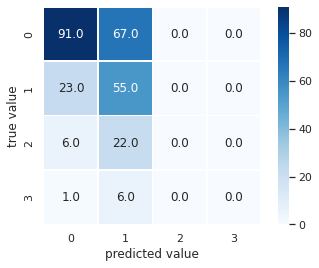

In [44]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred)
sns.heatmap(mat, square=True, annot=True,cmap=plt.cm.Blues, cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value');


In [45]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3 ']
print(classification_report(y_test, y2_pred, target_names=target_names))


              precision    recall  f1-score   support

     class 0       0.75      0.58      0.65       158
     class 1       0.37      0.71      0.48        78
     class 2       0.00      0.00      0.00        28
    class 3        0.00      0.00      0.00         7

    accuracy                           0.54       271
   macro avg       0.28      0.32      0.28       271
weighted avg       0.54      0.54      0.52       271



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>TASK-9C: Please apply a one-hot encoding method on the categorical data of the AD dataset.

In [79]:
categoricalcols = list(set(df.columns) - set(num_cols))
categoricalcols.remove('NACCAGEB')
categoricalcols.remove('NACCBRNV')
categorical_df = df[categoricalcols]
categorical_df

,ELAT,MOT,HXSTROKE,SEX,NACCTBI,IRR,NACCFAM,APA,ANX,DISN,NITE,DROPACT,DEPD,HALL,HXHYPER,DEL,APP,FOCLSIGN,AGIT,ANYMEDS
0,0,0,0,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1
2,0,0,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1
1350,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,1,1
1351,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1352,0,0,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [82]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_data = pd.get_dummies(df, columns =["MARISTAT"])
categorical_df[["MARISTAT_1","MARISTAT_2","MARISTAT_3","MARISTAT_4","MARISTAT_5","MARISTAT_6"]]=encoded_data[["MARISTAT_1","MARISTAT_2","MARISTAT_3","MARISTAT_4","MARISTAT_5","MARISTAT_6"]]

>TASK–9D: Please apply Multinomial Naive Bayes algorithms on the one-hot encoded categorical data of the AD dataset and predict the labels (CDRGLOB).

In [83]:
X_train, X_test, y_train, y_test = train_test_split(categorical_df, y, test_size=0.2, random_state=42)

In [84]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

alpha = [0.01, 0.1, 1, 10, 100]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(mnb, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [85]:
grid.best_params_

{'alpha': 0.01}

In [86]:
model = grid.best_estimator_
y2_pred = model.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model, X_train, y_train, cv=5)
score.mean()

0.5974227683905103

In [87]:
accuracy_score(y_test, y_pred)

0.7121771217712177

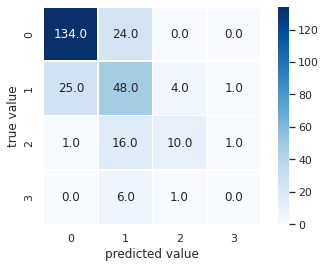

In [88]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred)
sns.heatmap(mat, square=True, annot=True,cmap=plt.cm.Blues, cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [89]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3 ']
print(classification_report(y_test, y2_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.84      0.85      0.84       158
     class 1       0.51      0.62      0.56        78
     class 2       0.67      0.36      0.47        28
    class 3        0.00      0.00      0.00         7

    accuracy                           0.71       271
   macro avg       0.50      0.46      0.47       271
weighted avg       0.70      0.71      0.70       271



>TASK-9E: Please merge the normalized numeric values and one-hot encoded categorical values and then apply the following regression methods (Linear, Ridge and Lasso) to predict the labels as numeric values. P

In [100]:
all=numerical_df.join(categorical_df)
all

,EDUC,MARISTAT,INDEPEND,RESIDENC,SMOKYRS,DIABETES,ALCOHOL,HYPERCHO,HACHIN,NACCGDS,...,APP,FOCLSIGN,AGIT,ANYMEDS,MARISTAT_1,MARISTAT_2,MARISTAT_3,MARISTAT_4,MARISTAT_5,MARISTAT_6
0,0.900861,0.050048,0.050048,0.050048,0.000000,0.000000,0.0,0.050048,0.000000,0.000000,...,0,0,0,1,1,0,0,0,0,0
1,0.645493,0.058681,0.058681,0.058681,0.000000,0.000000,0.0,0.058681,0.058681,0.000000,...,0,0,1,1,1,0,0,0,0,0
2,0.781303,0.048831,0.048831,0.048831,0.488314,0.048831,0.0,0.048831,0.000000,0.097663,...,0,0,0,1,1,0,0,0,0,0
3,0.903768,0.064555,0.064555,0.064555,0.000000,0.064555,0.0,0.064555,0.064555,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,1.292938,0.080809,0.080809,0.161617,4.040432,0.000000,0.0,0.000000,0.080809,0.080809,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1.174302,0.058715,0.058715,0.058715,0.000000,0.000000,0.0,0.058715,0.058715,0.000000,...,0,0,1,1,1,0,0,0,0,0
1350,0.899087,0.056193,0.112386,0.056193,0.000000,0.000000,0.0,0.000000,0.000000,0.056193,...,1,0,1,1,1,0,0,0,0,0
1351,0.891244,0.127321,0.063660,0.063660,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0,0,0,1,0,1,0,0,0,0
1352,1.356459,0.203469,0.067823,0.067823,1.695574,0.000000,0.0,0.067823,0.067823,0.135646,...,0,0,0,1,0,0,1,0,0,0


In [103]:
X = all

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [106]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error


lr = LinearRegression()
lr_pred = lr.fit(Xtrain,Ytrain).predict(Xtest)
print(r2_score(Ytest, lr_pred))

#Ridge Regression

from sklearn.linear_model import Ridge

rid = Ridge(alpha=0.1)
rid_pred = rid.fit(Xtrain,Ytrain).predict(Xtest)

print(r2_score(Ytest, rid_pred))

#Lasso Regression

from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.1)
lasso_pred = lasso.fit(Xtrain,Ytrain).predict(Xtest)

print(r2_score(Ytest, lasso_pred))


0.6352396084284431
0.6472569850375653
0.3654574864436465


>TASK-9F: Please find and apply the classification versions of the following algorithms (Linear, Ridge and Lasso) with the hyperparameter optimization.

In [107]:
model = LinearRegression()
linear = {   "fit_intercept": [True, False],
             "positive": [True, False],
             "n_jobs": np.arange(0,6)}
l_gr = GridSearchCV(LinearRegression(), linear, cv=5)
l_gr.fit(Xtrain, Ytrain)
print("Linear Regression Score:",l_gr.best_score_)

model = Ridge()
ridge = {    "fit_intercept": [True, False],
             "positive": [True, False],
             "alpha": np.arange(5),
           "max_iter": np.arange(0,6)}
r_gr = GridSearchCV(model, ridge, cv=5)
r_gr.fit(Xtrain,Ytrain)
print("Score with Ridge:",r_gr.best_score_)

model = Lasso()
lasso = {    "fit_intercept": [True, False],
             "positive": [True, False],
             "alpha": np.arange(5),
           "max_iter": np.arange(0,6),
           "precompute": [True, False]}
l_gr = GridSearchCV(model,lasso, cv=5)
l_gr.fit(Xtrain, Ytrain)
print("Score with Lasso:",l_gr.best_score_)


Linear Regression Score: 0.5953889464819826
Score with Ridge: 0.6397734755788425
Score with Lasso: 0.6200201792693036
